# **Calories Burnt Prediction**

**Dataset Link:-** https://www.kaggle.com/code/pragathiputhran/calories-burnt-prediction/data

In [102]:
# import required libraries
!pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [103]:
#Load the Calories dataset
df1 = pd.read_csv("calories.csv")
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [104]:
df1.shape

(15000, 2)

In [105]:
#Load the Exercise Dataset
df2 = pd.read_csv("exercise.csv")
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [106]:
df2.shape

(15000, 8)

**Now Concatenate both the Dataframe i.e df1 and df2**

In [107]:

df = pd.concat([df2,df1["Calories"]],axis=1)

In [108]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [110]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [111]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [112]:
# drop User_ID column because this is not required from Main Dataframe itself

df.drop(columns = ["User_ID"],axis=1,inplace =True)

In [113]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


#### **Separate Categorical and Numerical Features**

**1. Categorical Feature**

In [115]:
#Fatching Categorical Data
cat_col=[col for col in df.columns if df[col].dtype=='O'] #-->Object-"o"
cat_col

['Gender']

In [116]:
df["Gender"].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

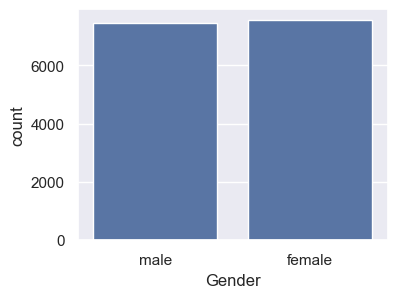

In [117]:
# plotting the gender column in count plot
plt.figure(figsize = (4,3))
sns.countplot(x=df['Gender'])
plt.show()

In [118]:
pd.get_dummies(df["Gender"],drop_first=True)

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


In [119]:
categorical = df[cat_col]
categorical.head()

,Gender
0,male
1,female
2,male
3,female
4,female


In [120]:
categorical = pd.get_dummies(categorical["Gender"],drop_first=True)
categorical

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


**2.Numerical Features**

In [121]:
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Num_col

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [122]:
df[Num_col].shape

(15000, 7)

In [123]:
Numerical = df[Num_col]
Numerical.head() 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


In [124]:
Numerical.shape

(15000, 7)

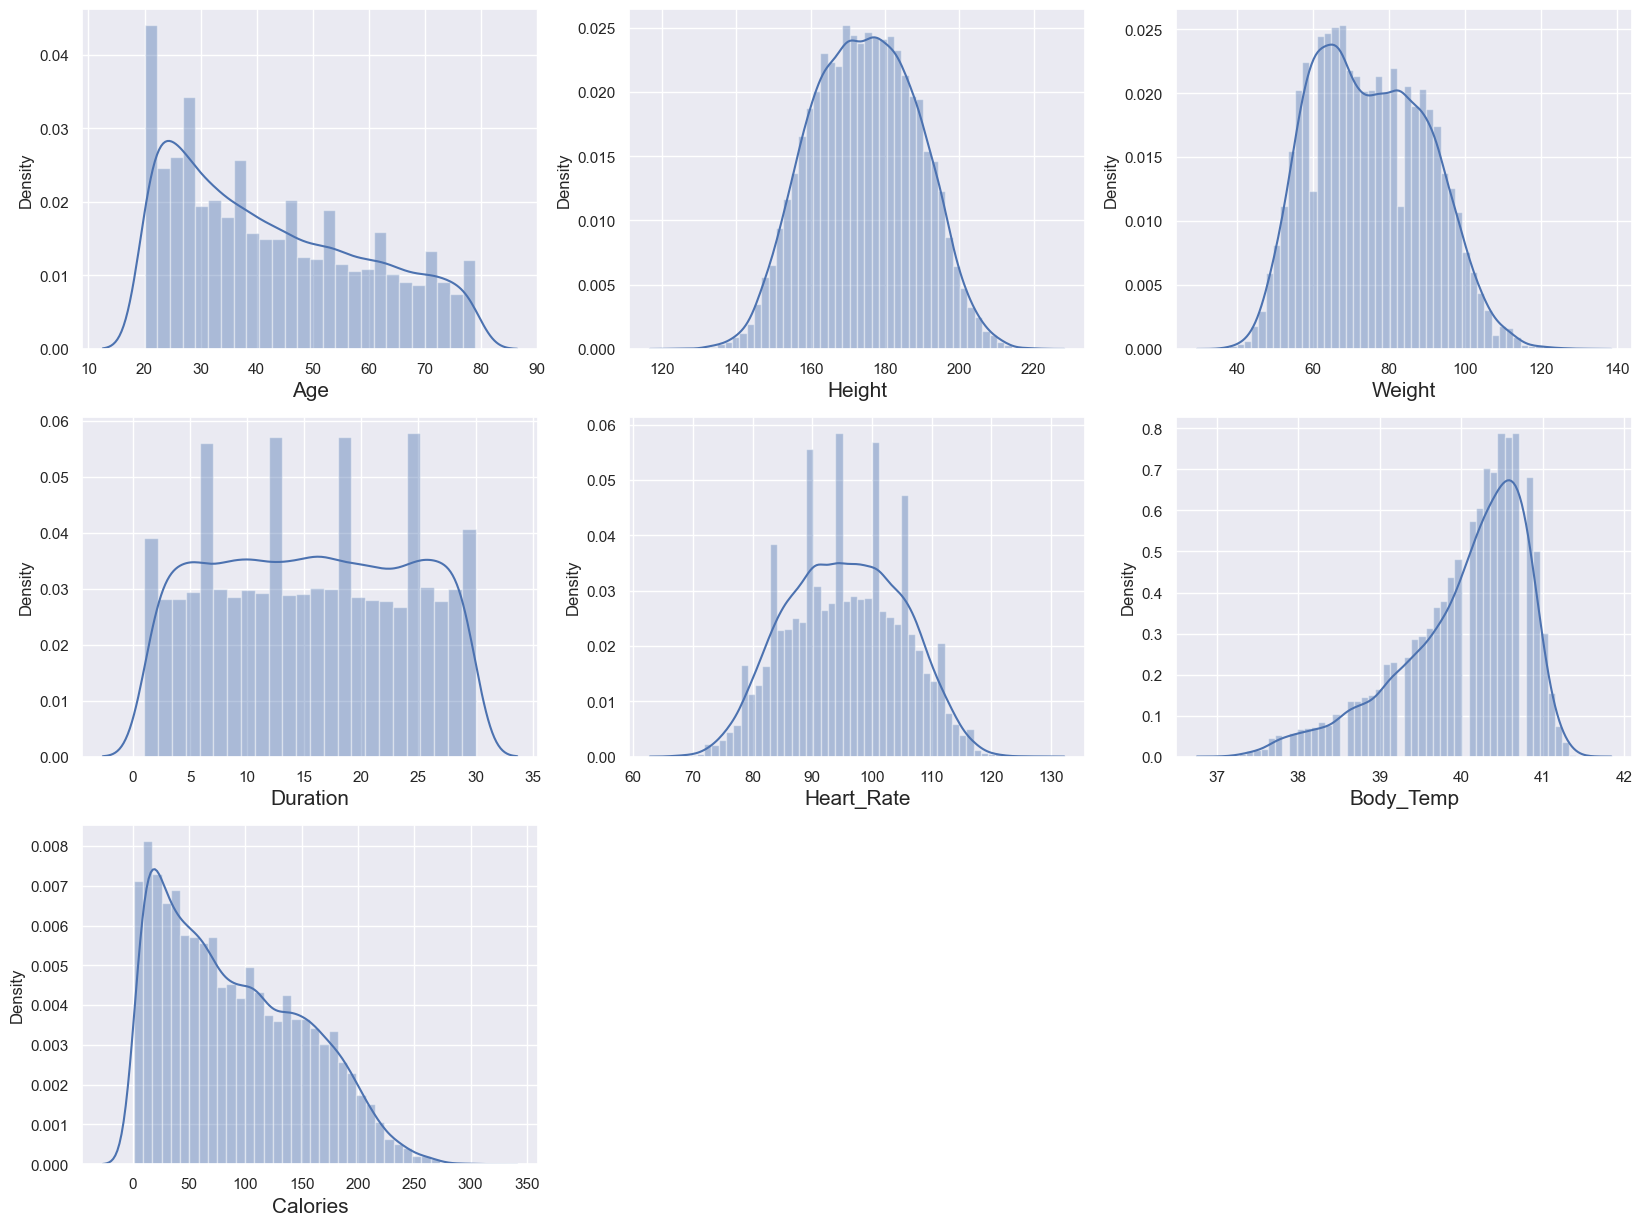

In [125]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

<Axes: >

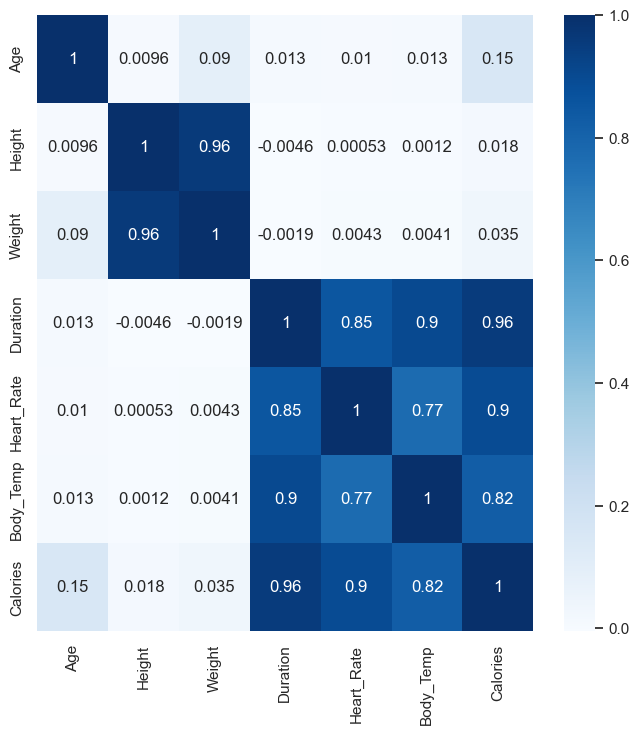

In [126]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

### **Concatenate Categorical and Numerical**

In [127]:
data = pd.concat([categorical,Numerical],axis=1)

In [128]:
data.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,True,68,190.0,94.0,29.0,105.0,40.8,231.0
1,False,20,166.0,60.0,14.0,94.0,40.3,66.0
2,True,69,179.0,79.0,5.0,88.0,38.7,26.0
3,False,34,179.0,71.0,13.0,100.0,40.5,71.0
4,False,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

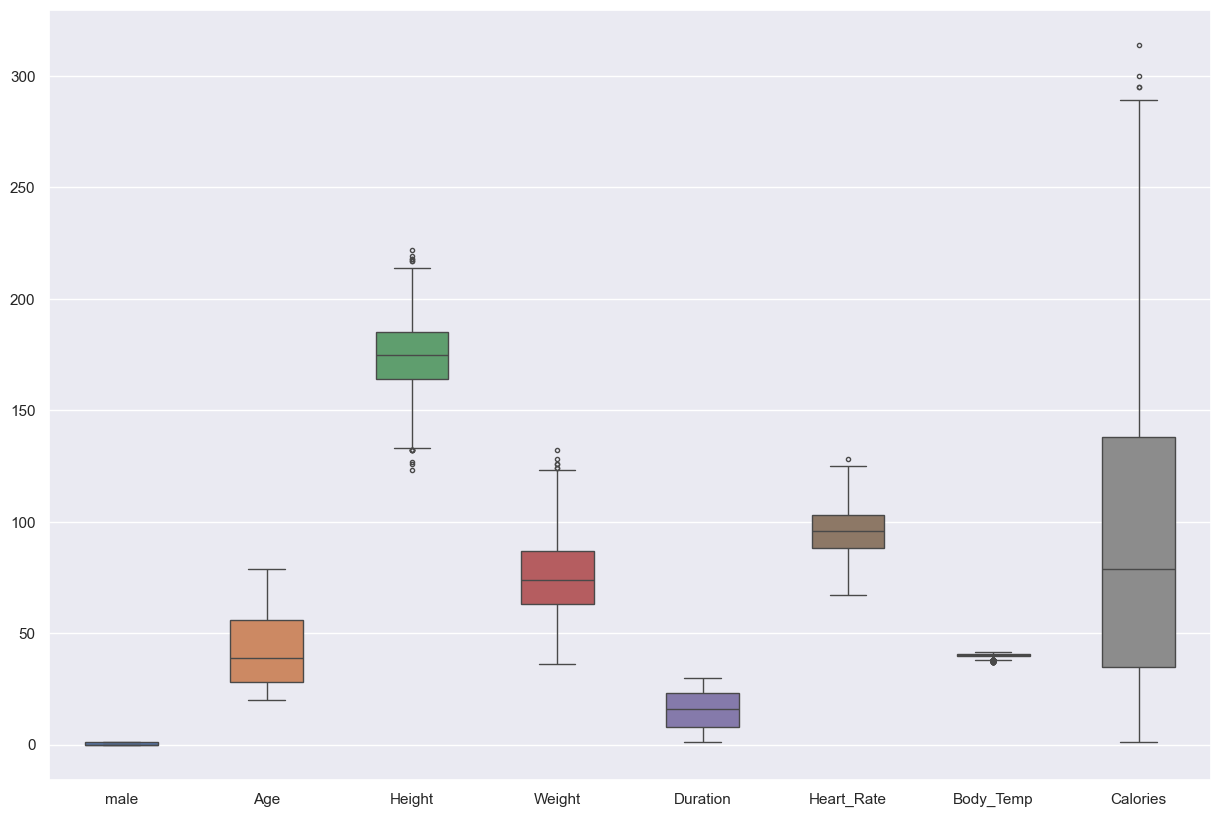

In [129]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

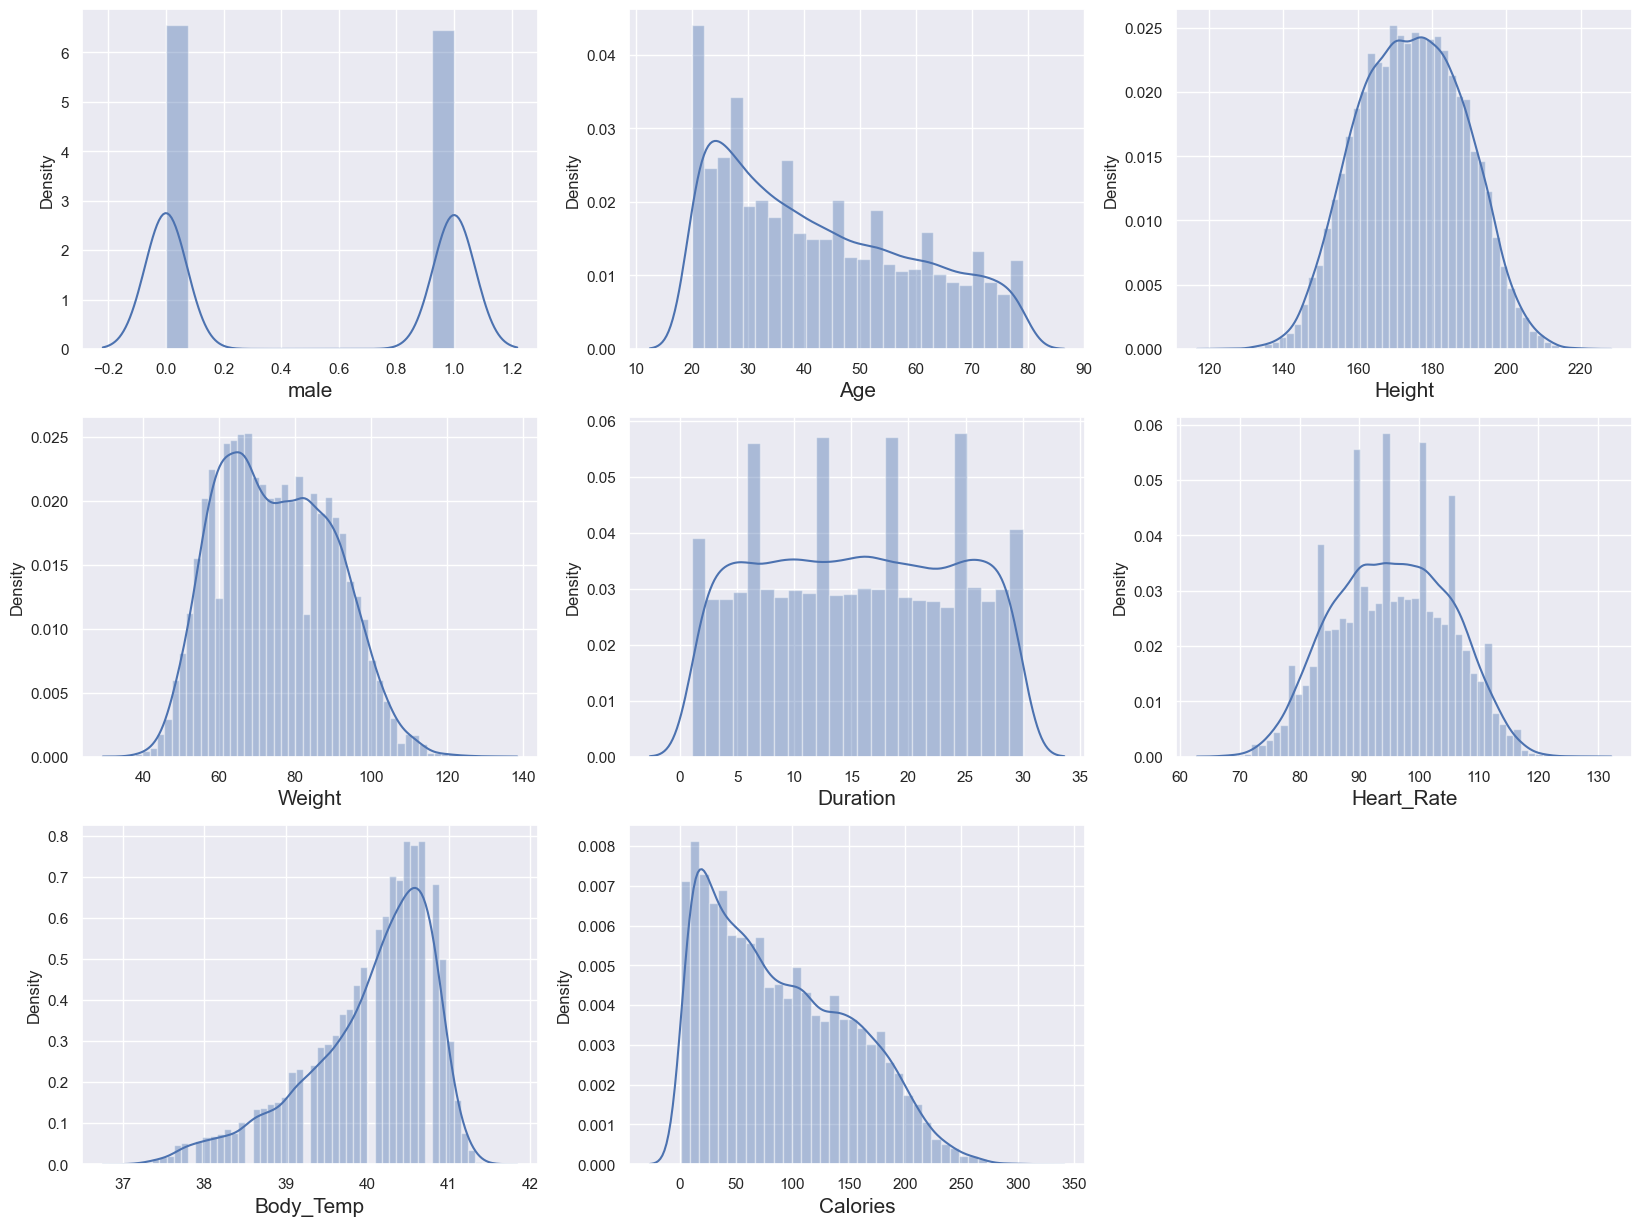

In [130]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

In [131]:
data.columns

Index(['male', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [132]:
X = data.drop(columns = ["Calories"],axis = 1)
y = data["Calories"]

In [133]:
X.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,True,68,190.0,94.0,29.0,105.0,40.8
1,False,20,166.0,60.0,14.0,94.0,40.3
2,True,69,179.0,79.0,5.0,88.0,38.7
3,False,34,179.0,71.0,13.0,100.0,40.5
4,False,27,154.0,58.0,10.0,81.0,39.8


In [134]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [135]:
# Split the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [136]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (12000, 7)
Shape of X Test:  (3000, 7)
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


In [137]:
#from sklearn import metrics
from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')

    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    

## Function to export the model

In [138]:
import pickle
def dump_model(model, model_name):
    # Save the model to a file with a unique name
    filename = f'saved_model_{model_name}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to '{filename}'")

**XGB Regressor**

In [139]:
from xgboost import XGBRegressor
XGB_regression = predict(XGBRegressor())

dump_model(XGB_regression, 'XGB_regression')

Score : 0.9995380557081355
predictions are: 
 [197.06581   70.867226 196.99498  ...  29.043041 104.09284   14.61472 ]


r2 score: 0.9986863132331905
MAE: 1.5521575984954834
MSE: 5.2744122853837005
RMSE: 2.2966088664340956
Model saved to 'saved_model_XGB_regression.pkl'


**Linear Regression**

In [140]:
from sklearn.linear_model import LinearRegression
Linear_regression = predict(LinearRegression())

dump_model(Linear_regression, 'Linear_regression')

Score : 0.967592555473578
predictions are: 
 [198.81182363  80.43555305 194.40940033 ...  22.14745631 118.63504926
 -11.98134672]


r2 score: 0.9655977245826503
MAE: 8.47907174598793
MSE: 138.12408611460938
RMSE: 11.752620393538175
Model saved to 'saved_model_Linear_regression.pkl'


**DecisionTree Regression**

In [141]:
from sklearn.tree import DecisionTreeRegressor
Decision_Tree_Regressor = predict(DecisionTreeRegressor())

dump_model(Decision_Tree_Regressor, 'Decision_Tree_Regressor')

Score : 1.0
predictions are: 
 [194.  75. 204. ...  30. 109.  14.]


r2 score: 0.9923862435088956
MAE: 3.531
MSE: 30.569
RMSE: 5.528923945941018
Model saved to 'saved_model_Decision_Tree_Regressor.pkl'


**RandomForest Regression**

In [142]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest_Regressor = predict(RandomForestRegressor())

dump_model(Random_Forest_Regressor, 'Random_Forest_Regressor')

Score : 0.9996868926973592
predictions are: 
 [196.25  67.39 197.44 ...  27.29 111.02  14.19]


r2 score: 0.9977014264422586
MAE: 1.8076566666666665
MSE: 9.2287027
RMSE: 3.0378779929417834
Model saved to 'saved_model_Random_Forest_Regressor.pkl'
